## Descriptive Statistics

#### importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importing Data

In [3]:
# using an IBM API
dfr='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
df=pd.read_csv(dfr)
df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


let us analyze the performance of professors is mostly influenced by what factors

#### getting to know the data

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

In [7]:
df.shape

(463, 19)

we have 463 entries and 19 features of the data

In [8]:
df.isnull().sum()

minority           0
age                0
gender             0
credits            0
beauty             0
eval               0
division           0
native             0
tenure             0
students           0
allstudents        0
prof               0
PrimaryLast        0
vismin             0
female             0
single_credit      0
upper_division     0
English_speaker    0
tenured_prof       0
dtype: int64

we have no non-zero entries

In [9]:
df['students'].mean() # mean for students

36.62419006479482

In [10]:
df['students'].std() #standard deviation for students

45.01848127156702

In [12]:
df['students'].min() #minimum value for students

5

In [13]:
df['students'].median()

23.0

In [14]:
df['students'].max()

380

#### Descriptive Table

In [15]:
df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking the distribution of evaluation score

(array([ 3.,  2., 13., 27., 52., 76., 88., 93., 76., 33.]),
 array([2.0999999 , 2.38999991, 2.67999992, 2.96999993, 3.25999994,
        3.54999995, 3.83999996, 4.12999997, 4.41999998, 4.70999999,
        5.        ]),
 <BarContainer object of 10 artists>)

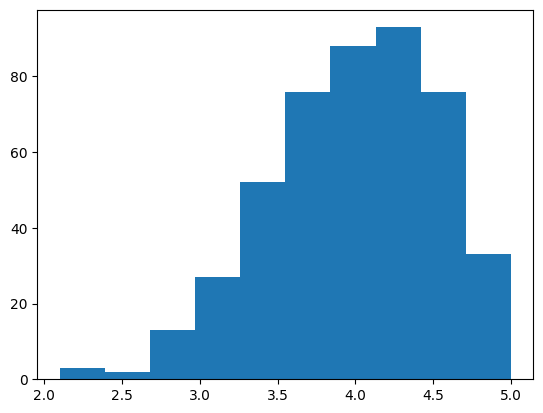

In [16]:
plt.hist(df['eval'])

we observe that the majority of the data on the evaluation score varies from 3.5 to 5

we can as well check the mean of the evaluation to confirm

In [18]:
df['eval'].mean()

3.9982721362721585

we see the mean is approximately 4.0

 Does average beauty score differ by gender? Let's see the means and standard deviations for both male and female instructors

In [19]:
df.groupby('gender').agg({'beauty':['mean', 'std', 'var']}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?

In [20]:
count = df[df.tenure == 'yes'].groupby('gender').agg({'tenure': 'count'}).reset_index()

In [21]:
count['percentage'] = 100 * count.tenure/count.tenure.sum()
count

,gender,tenure,percentage
0,female,145,40.166205
1,male,216,59.833795


 Calculate the percentage of visible minorities are tenure professors. We look at tenure status that differed if teacher is a visible minority?

In [22]:
minority_c=df.groupby('minority').agg({'tenure':'count'}).reset_index()
minority_p=100*minority_c.tenure/minority_c.tenure.sum()
minority_p

0    86.177106
1    13.822894
Name: tenure, dtype: float64

Does average age differ by tenure? we produce the means and standard deviations for both tenured and untenured professors.

In [23]:
tenured= df.groupby('tenure').agg({'age':['mean','std']}).reset_index()
tenured

tenure        age           
               mean        std
0     no  50.186275   6.946372
1    yes  47.850416  10.420056

(array([41., 37., 58., 48., 75., 74., 53., 69.,  0.,  8.]),
 array([29. , 33.4, 37.8, 42.2, 46.6, 51. , 55.4, 59.8, 64.2, 68.6, 73. ]),
 <BarContainer object of 10 artists>)

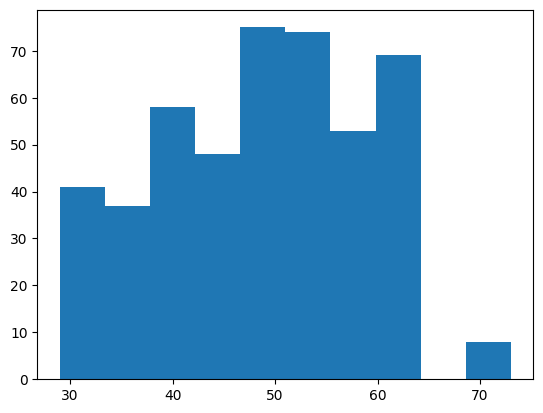

In [24]:
plt.hist(df['age'])

In [25]:
df['age'].mean()

48.365010799136066

<BarContainer object of 2 artists>

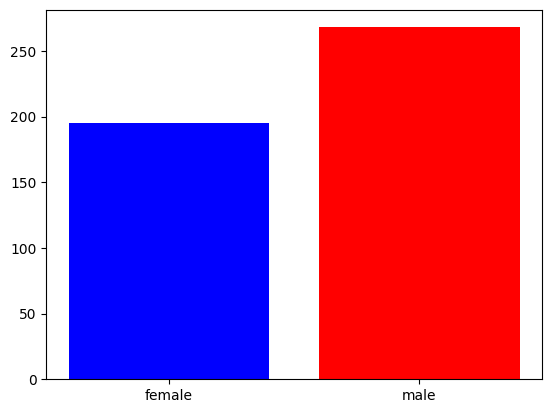

In [26]:
plt.bar ( df.gender.unique(), df.gender.value_counts(sort=False), color=['blue','red']) # plotting gender bar chart

In [27]:
tenure = df[ df ['tenure'] == 'yes'] ['eval'].median() #median value for tenured
tenure

4.0